In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
%matplotlib inline

# Read in dataset:

In [6]:
df = pd.read_csv('C:\Users\dsingh\Documents\Data Science\Allstate_Kaggle\\train.csv')
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


# Overview of data: how many observations? Any null values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [8]:
df[df.isnull().any(axis=1)]

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss


In [9]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


# Getting a sense of correlation between some of the categorical variables and claim severity:

In [28]:
def explore(variable):
    print 'VALUE COUNTS'
    print df[variable].value_counts()
    print 'AVERAGE CLAIM SEVERITY'
    print df.groupby([variable])['loss'].mean()
    sns.stripplot(x=variable, y='loss', data=df, jitter=True);

VALUE COUNTS
A    141550
B     46768
Name: cat1, dtype: int64
AVERAGE CLAIM SEVERITY
cat1
A    3408.091515
B    1915.198521
Name: loss, dtype: float64


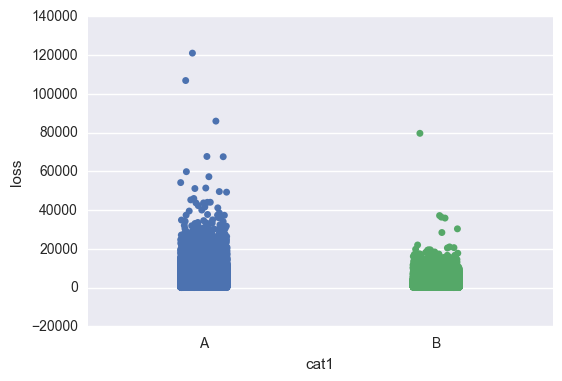

In [29]:
explore('cat1')

VALUE COUNTS
A    106721
B     81597
Name: cat2, dtype: int64
AVERAGE CLAIM SEVERITY
cat2
A    2454.139844
B    3800.104171
Name: loss, dtype: float64


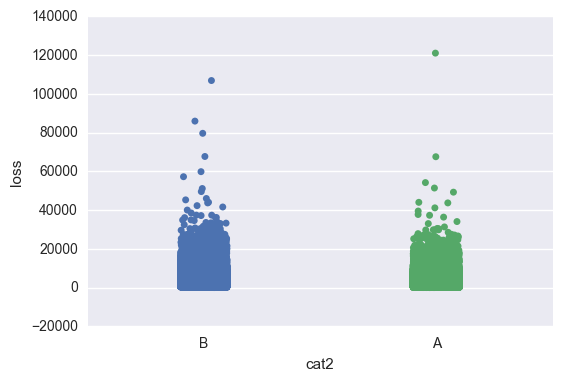

In [30]:
explore('cat2')

VALUE COUNTS
A    177993
B     10325
Name: cat3, dtype: int64
AVERAGE CLAIM SEVERITY
cat3
A    2902.219751
B    5366.640014
Name: loss, dtype: float64


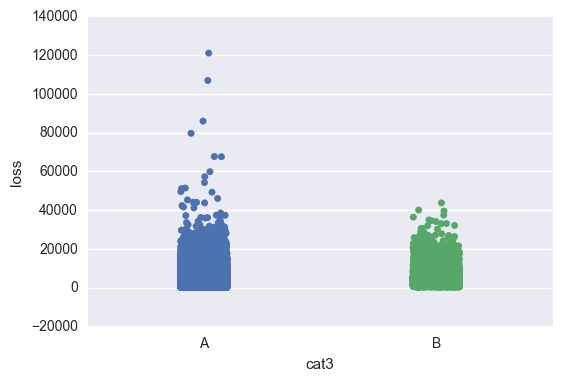

In [31]:
explore('cat3')

# VISUALIZING DISTRIBUTIONS OF CONTINUOUS VARIABLES

In [44]:
def explore_cont(variable):
    x = np.array(df[variable]).astype(np.float)
    sns.distplot(x);
    df2 = pd.concat([df[variable], df['loss']], axis=1)
    print df2.corr()

          cont1      loss
cont1  1.000000 -0.010237
loss  -0.010237  1.000000


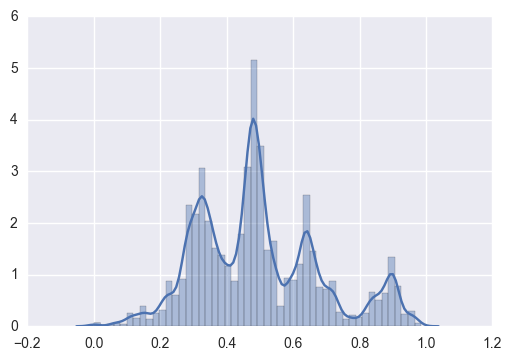

In [45]:
explore_cont('cont1')

          cont2      loss
cont2  1.000000  0.141528
loss   0.141528  1.000000


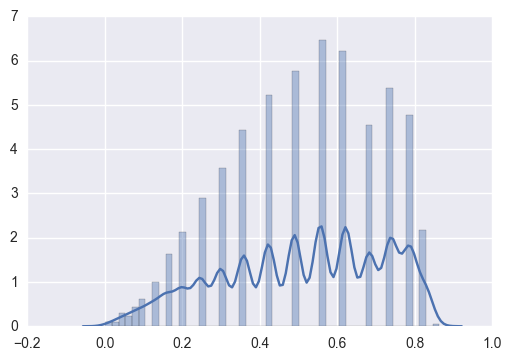

In [46]:
explore_cont('cont2')

# EXPLORING CORRELATIONS AMONG CONTINUOUS VARIABLES

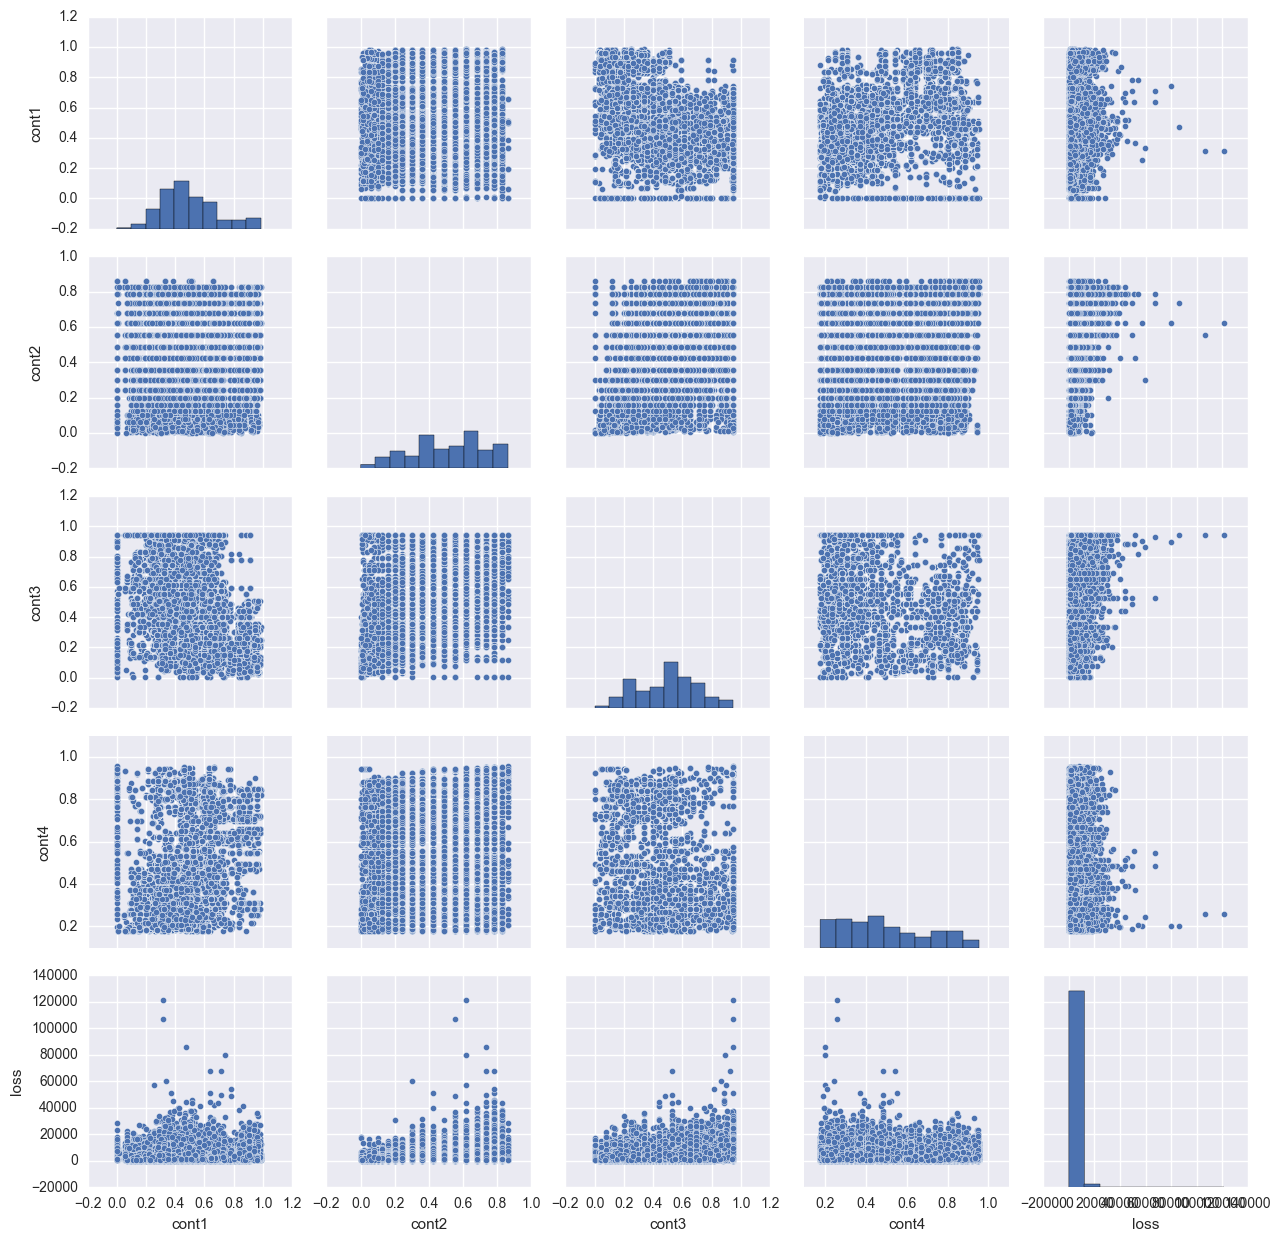

In [48]:
df_continous_variables = pd.concat([df['cont1'], df['cont2'],df['cont3'],df['cont4'],df['loss']], axis=1)
sns.pairplot(df_continous_variables);

In [49]:
df_continous_variables.corr()

,cont1,cont2,cont3,cont4,loss
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.010237
cont2,-0.085180,1.000000,0.455861,0.038693,0.141528
cont3,-0.445431,0.455861,1.000000,-0.341633,0.111053
cont4,0.367549,0.038693,-0.341633,1.000000,-0.035831
loss,-0.010237,0.141528,0.111053,-0.035831,1.000000


### There is some correlation among the continuous variables (notably between cont2 and cont3), but doesn't appear to be too high